# Numerical Python

NumPy is the fundamental package required for scientific computing and data analysis.
It is the foundation (ie a dependency) on which many of the higher-level tools are built.

## NumPy ndarray

ndarray is N-dimensional array object which is fast and flexible.

In [1]:
import numpy as np

In [5]:
data = np.array([[1,2,3], [4,5,6]])
data

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
type(data)

numpy.ndarray

In [7]:
data.dtype

dtype('int64')

In [8]:
data.ndim

2

In [9]:
data.shape

(2, 3)

In [10]:
x = data.reshape(6)
x.shape

(6,)

In [11]:
x[0] = 7
data

array([[7, 2, 3],
       [4, 5, 6]])

NumPy data types: int32, int64, float32, float64, bool, object.

Fixed length strings are also available: string\_, unicode\_.

For creating strings with length 8, do S8 or U8.

In [12]:
data = np.array([[1,2,3], [4,5,6]], dtype=np.float64)
data

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [13]:
data.dtype

dtype('float64')

In [14]:
data = data * 10 - 1
data

array([[  9.,  19.,  29.],
       [ 39.,  49.,  59.]])

In [15]:
str_data = np.array(['1.23', '4.56', '7.89'], dtype='U4')
str_data

array(['1.23', '4.56', '7.89'], 
      dtype='<U4')

In [16]:
print(str_data[0])
type(str_data[0])

1.23


numpy.str_

In [17]:
data = str_data.astype(np.float64)
data

array([ 1.23,  4.56,  7.89])

In [18]:
obj_data = np.array([1.23, '4.56', [7, 8, 9]])
obj_data

ValueError: setting an array element with a sequence

In [19]:
obj_data = np.array([1.23, '4.56', [7, 8, 9]], dtype=np.object)
obj_data

array([1.23, '4.56', [7, 8, 9]], dtype=object)

In [20]:
obj_data[2]

[7, 8, 9]

In [21]:
obj_data[2][1] = 0

### np.arange

In [23]:
int_range = np.arange(12).reshape((3,4))
int_range

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

### np.random

In [24]:
np.random.seed(123)
rnd_data = np.random.random(12).reshape((3,4))
rnd_data

array([[ 0.69646919,  0.28613933,  0.22685145,  0.55131477],
       [ 0.71946897,  0.42310646,  0.9807642 ,  0.68482974],
       [ 0.4809319 ,  0.39211752,  0.34317802,  0.72904971]])

### element-wise operations

In [25]:
int_range * rnd_data

array([[ 0.        ,  0.28613933,  0.45370291,  1.65394431],
       [ 2.87787588,  2.1155323 ,  5.88458519,  4.79380817],
       [ 3.84745521,  3.52905766,  3.43178016,  8.01954678]])

In [26]:
int_range + rnd_data

array([[  0.69646919,   1.28613933,   2.22685145,   3.55131477],
       [  4.71946897,   5.42310646,   6.9807642 ,   7.68482974],
       [  8.4809319 ,   9.39211752,  10.34317802,  11.72904971]])

### basic indexing and slicing

In [27]:
int_range[1]

array([4, 5, 6, 7])

In [28]:
int_range[1][1], int_range[1,1]

(5, 5)

In [30]:
int_range[1,1], int_range[1,1:2]

(5, array([5]))

In [31]:
int_range[1,1:3]

array([5, 6])

In [32]:
# broadcast
rnd_data[1] = 0
rnd_data

array([[ 0.69646919,  0.28613933,  0.22685145,  0.55131477],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.4809319 ,  0.39211752,  0.34317802,  0.72904971]])

In [33]:
# broadcast
rnd_data[:, 1] = 9
rnd_data

array([[ 0.69646919,  9.        ,  0.22685145,  0.55131477],
       [ 0.        ,  9.        ,  0.        ,  0.        ],
       [ 0.4809319 ,  9.        ,  0.34317802,  0.72904971]])

In [34]:
# basic slice returns a view
x = rnd_data[1,2:4]
x[1] = -100
rnd_data

array([[   0.69646919,    9.        ,    0.22685145,    0.55131477],
       [   0.        ,    9.        ,    0.        , -100.        ],
       [   0.4809319 ,    9.        ,    0.34317802,    0.72904971]])

In [35]:
# make explicit copy
x = rnd_data[1,2:4].copy()
x[1] = 1
rnd_data

array([[   0.69646919,    9.        ,    0.22685145,    0.55131477],
       [   0.        ,    9.        ,    0.        , -100.        ],
       [   0.4809319 ,    9.        ,    0.34317802,    0.72904971]])

In [36]:
# list and stride
rnd_data[:,::2]

array([[ 0.69646919,  0.22685145],
       [ 0.        ,  0.        ],
       [ 0.4809319 ,  0.34317802]])

In [37]:
# newaxis
z = rnd_data[:, :, np.newaxis]
z.shape

(3, 4, 1)

In [38]:
# concatenate
z = np.concatenate((z, z), axis=2)
z.shape

(3, 4, 2)

In [39]:
# ellipsis
z[...,1]

array([[   0.69646919,    9.        ,    0.22685145,    0.55131477],
       [   0.        ,    9.        ,    0.        , -100.        ],
       [   0.4809319 ,    9.        ,    0.34317802,    0.72904971]])

In [40]:
# reverse is still a view
x = np.arange(10)
y = x[::-1]
print(y)
y[0] = 100
print(x)

[9 8 7 6 5 4 3 2 1 0]
[  0   1   2   3   4   5   6   7   8 100]


### advanced indexing
is triggered when the selection object, obj, is a non-tuple sequence object.

Advanced indexing gives a copy, not a view, see https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

In [41]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x1 = x[[0, 1, 0], [2, 1, 0]]
x1[1] = 100
print(x1)
x

[  3 100   1]


array([[1, 2, 3],
       [4, 5, 6]])

In [42]:
# list and stride
z = rnd_data[[2,0],::2]
z[1,1] = 66
z

array([[  0.4809319 ,   0.34317802],
       [  0.69646919,  66.        ]])

In [43]:
# but the source array is not affected
rnd_data

array([[   0.69646919,    9.        ,    0.22685145,    0.55131477],
       [   0.        ,    9.        ,    0.        , -100.        ],
       [   0.4809319 ,    9.        ,    0.34317802,    0.72904971]])

### initialised arrays

In [44]:
a = np.zeros((2,3,4), dtype=np.float64)
a.shape

(2, 3, 4)

In [45]:
a = np.ones((2,3), dtype=np.int)
a

array([[1, 1, 1],
       [1, 1, 1]])

### boolean indexing

In [46]:
a[:,1] = -1
a

array([[ 1, -1,  1],
       [ 1, -1,  1]])

In [47]:
a > 0

array([[ True, False,  True],
       [ True, False,  True]], dtype=bool)

In [48]:
a[a>0] = 0
a

array([[ 0, -1,  0],
       [ 0, -1,  0]])

In [49]:
# however
a = np.ones((2,3), dtype=np.int)
a[:,1] = -1
b = a[a>0]
b

array([1, 1, 1, 1])

### array operations

In [50]:
a = np.arange(12).reshape((3,4))
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [51]:
a.T

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [52]:
np.dot(a, a.T)

array([[ 14,  38,  62],
       [ 38, 126, 214],
       [ 62, 214, 366]])

In [53]:
a.swapaxes(1,0)

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

### element-wise array functions

In [54]:
a = np.arange(12).reshape((3,4)).astype(dtype=np.float64)
a

array([[  0.,   1.,   2.,   3.],
       [  4.,   5.,   6.,   7.],
       [  8.,   9.,  10.,  11.]])

In [55]:
np.exp(a)

array([[  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
          2.00855369e+01],
       [  5.45981500e+01,   1.48413159e+02,   4.03428793e+02,
          1.09663316e+03],
       [  2.98095799e+03,   8.10308393e+03,   2.20264658e+04,
          5.98741417e+04]])

In [56]:
np.maximum(np.exp(a), a*100)

array([[  1.00000000e+00,   1.00000000e+02,   2.00000000e+02,
          3.00000000e+02],
       [  4.00000000e+02,   5.00000000e+02,   6.00000000e+02,
          1.09663316e+03],
       [  2.98095799e+03,   8.10308393e+03,   2.20264658e+04,
          5.98741417e+04]])

In [59]:
def f(a):
    x = np.empty(a.shape, dtype=np.float64)
    s = a.shape
    for i in range(s[0]):
        for j in range(s[1]):
            x[i,j] = np.exp(a[i,j])
    return x

In [57]:
a = np.random.random(1000000).reshape((1000,1000)).astype(dtype=np.float64)

In [60]:
%timeit b = f(a)

3.6 s ± 559 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [61]:
%timeit b = np.exp(a)

56.6 ms ± 2.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### data processing

In [62]:
points = np.arange(-5, 5, 0.1)   # 100 equally spaced points
xs, ys = np.meshgrid(points, points)
xs

array([[-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       ..., 
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9]])

In [63]:
z = np.exp(-0.1*(xs**2+ys**2))
#z = np.sqrt(xs**2+ys**2)

In [64]:
import matplotlib.pyplot as plt
# %matplotlib inline

Text(0.5,1,'Image plot of $\\sqrt{x^2+y^2}$')

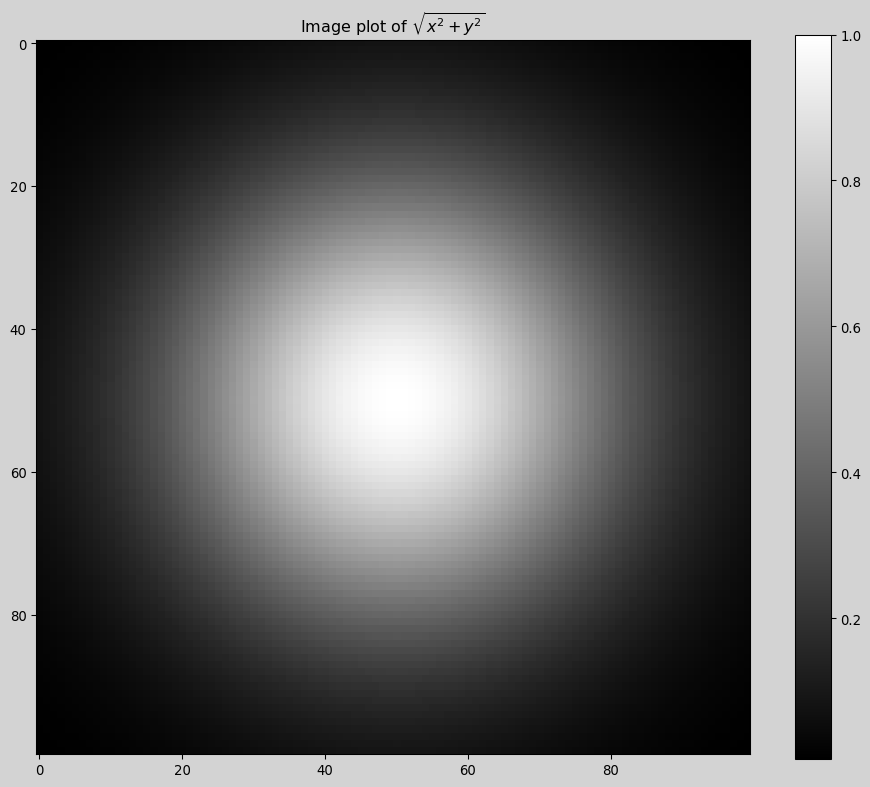

In [67]:
plt.figure(figsize=(12, 10), dpi=96, facecolor='lightgray')
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2+y^2}$")

### conditional logic as array ops

In [ ]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, -2.2, 2.3, -2.4, 2.5])
zarr = np.array([True, False, False, True, True])

In [ ]:
result = [(x if z else y) for x, y, z in zip(xarr, yarr, zarr)]
np.array(result)

In [ ]:
# if condition True X, otherwise Y
result = np.where(zarr, xarr, yarr)
result

In [ ]:
# this works too
result = np.where(yarr > 1, xarr, 0)
result

### math and stat methods

In [ ]:
xarr.max(), xarr.min(), xarr.sum(), xarr.mean(), xarr.std(), xarr.var()

In [ ]:
np.mean(yarr), np.max(yarr), np.min(yarr)

### other functions

In [ ]:
# reshuffle in place
np.random.shuffle(xarr)
xarr

In [ ]:
# sort in place
xarr.sort()
xarr

In [ ]:
xarr = np.concatenate((xarr, xarr))
xarr

In [ ]:
np.unique(xarr)

### save and read files

In [ ]:
np.save('xarr.npy', xarr)

In [ ]:
! ls -l xarr.npy

In [ ]:
yarr = np.load('xarr.npy')
yarr

In [ ]:
# compressed archive
np.savez('files.npz', xarr=xarr, zarr=zarr)

In [ ]:
archive = np.load('files.npz')

In [ ]:
archive.keys()

In [ ]:
archive['xarr']

In [ ]:
archive['zarr']

In [ ]:
xarr = np.random.random((100,5))
xarr[:,0] = np.arange(100)

In [ ]:
xarr[:3,:]

In [ ]:
np.savetxt('xarr.csv', xarr, delimiter=',', fmt='%16.10f')

In [ ]:
! head xarr.csv

In [ ]:
yarr = np.loadtxt('xarr.csv', delimiter=',')

In [ ]:
yarr[:3,:]

### arg functions

In [ ]:
# Returns the indices of the maximum values along an axis
np.argmax(yarr[:,0])

In [ ]:
# by default the index is into flattened array unless axis is specified
np.argmax(yarr, axis=0)

In [ ]:
np.argmin(yarr, axis=0)

In [ ]:
yarr.flags